In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
inputfile = 'data/train_flatten.csv'

In [3]:
data = pd.read_csv(inputfile, delimiter=',', skipinitialspace=True)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,bounces,...,medium,referralPath,source,city,continent,country,metro,networkDomain,region,subContinent
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,1.0,...,organic,NaN,google,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,1.0,...,organic,NaN,google,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,1.0,...,organic,NaN,google,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,1.0,...,organic,NaN,google,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia
4,4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,1.0,...,organic,NaN,google,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe


In [5]:
col_time = ['transactionRevenue', 'fullVisitorId', 'visitId', 
             'date', 'visitStartTime', 'visitNumber']

col_device = ['transactionRevenue', 'fullVisitorId', 'visitId', 
              'browser', 'deviceCategory', 'isMobile', 'operatingSystem']


In [6]:
data_time = data[col_time]
data_device = data[col_device]

In [76]:
# convert transcation to Trans and NonTrans
data_time['trans'] = pd.notnull(data_time['transactionRevenue'])
data_device['trans'] = pd.notnull(data_time['transactionRevenue'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
data_time['trans'].tail()

903648    False
903649    False
903650    False
903651    False
903652    False
Name: trans, dtype: bool

# EDA with time

In [78]:
data_time.tail()

,transactionRevenue,fullVisitorId,visitId,date,visitStartTime,visitNumber,visitTime,weekday,month,year,hour,trans
903648,NaN,5123779100307500332,1483554750,20170104,1483554750,1,2017-01-04 18:32:30,2,1,2017,18,False
903649,NaN,7231728964973959842,1483543798,20170104,1483543798,1,2017-01-04 15:29:58,2,1,2017,15,False
903650,NaN,5744576632396406899,1483526434,20170104,1483526434,1,2017-01-04 10:40:34,2,1,2017,10,False
903651,NaN,2709355455991750775,1483592857,20170104,1483592864,1,2017-01-05 05:07:44,3,1,2017,5,False
903652,NaN,814900163617805053,1483574474,20170104,1483574474,1,2017-01-05 00:01:14,3,1,2017,0,False


- **visitStartTime** is defined as POSIX time in Google Analytics schema, which means number of seconds since epoch. BigQuery TIMESTAMP is encoded as number of microseconds since epoch. 
- 'The timestamp (expressed as POSIX time)' and as such it is expressed in UTC.       
          
- On the other hand **date** (or ga:date to be more specific) comes from Google Analytics and it is expressed on the timezone that the GA administrator has configured in the specific view's settings. 
- In layman terms, it is a property of the website, not the client/web browser and it should be consistent in all rows if they came from the same view irrespectively of the timezone of the visitor.   
- That being said, and knowing that the data come from Google Merchandise Store which resides in California (which is UTC -7), every session started between 00:00 and 07:00 it is accounted in the previous day "date wise" and to the next day "visitStartTime wise".

In [79]:
# why warning
data_time.loc[:,'visitTime'] = pd.to_datetime(
    data_time.loc[:,'visitStartTime'], unit='s')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [80]:
data_time[['visitTime','date']].head()

,visitTime,date
0,2016-09-02 15:33:05,20160902
1,2016-09-03 05:22:27,20160902
2,2016-09-03 01:16:26,20160902
3,2016-09-03 05:40:13,20160902
4,2016-09-02 13:23:20,20160902


In [81]:
# choose to use visitStarTime and extract weekday, month, year, hour
data_time['weekday'] = data_time['visitTime'].dt.weekday
data_time['month'] = data_time['visitTime'].dt.month
data_time['year'] = data_time['visitTime'].dt.year
data_time['hour'] = data_time['visitTime'].dt.hour

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [82]:
data_time[['year','month', 'weekday', 'hour']].head(10)

,year,month,weekday,hour
0,2016,9,4,15
1,2016,9,5,5
2,2016,9,5,1
3,2016,9,5,5
4,2016,9,4,13
5,2016,9,4,9
6,2016,9,4,11
7,2016,9,4,10
8,2016,9,4,8
9,2016,9,4,10


In [83]:
data_time.describe()

,transactionRevenue,visitId,date,visitStartTime,visitNumber,weekday,month,year,hour
count,1.151500e+04,9.036530e+05,9.036530e+05,9.036530e+05,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,1.337448e+08,1.485007e+09,2.016589e+07,1.485007e+09,2.264897,2.751471,6.991924,2016.517420,12.529160
std,4.482852e+08,9.022124e+06,4.697698e+03,9.022124e+06,9.283735,1.908982,3.485642,0.499697,6.825449
min,1.000000e+04,1.470035e+09,2.016080e+07,1.470035e+09,1.000000,0.000000,1.000000,2016.000000,0.000000
25%,2.493000e+07,1.477561e+09,2.016103e+07,1.477561e+09,1.000000,1.000000,4.000000,2016.000000,7.000000
50%,4.945000e+07,1.483949e+09,2.017011e+07,1.483949e+09,1.000000,3.000000,7.000000,2017.000000,14.000000
75%,1.076550e+08,1.492759e+09,2.017042e+07,1.492759e+09,1.000000,4.000000,10.000000,2017.000000,18.000000
max,2.312950e+10,1.501657e+09,2.017080e+07,1.501657e+09,395.000000,6.000000,12.000000,2017.000000,23.000000


In [84]:
data_time.groupby('trans').agg(['mean', 'count'])

transactionRevenue              visitId                  date          \
                    mean  count          mean   count          mean   count   
trans                                                                         
False                NaN      0  1.484996e+09  892138  2.016588e+07  892138   
True        1.337448e+08  11515  1.485876e+09   11515  2.016622e+07   11515   

      visitStartTime         visitNumber           weekday             month  \
                mean   count        mean   count      mean   count      mean   
trans                                                                          
False   1.484996e+09  892138    2.241428  892138  2.754684  892138  6.992962   
True    1.485876e+09   11515    4.083196   11515  2.502562   11515  6.911507   

                      year               hour          
        count         mean   count       mean   count  
trans                                                  
False  892138  2016.516976  892138  12.508535  892138  
True    11515  2016.551802   11515  14.127139   11515

## for hour

In [85]:
data_t_trans = data_time.loc[data_time.trans == 1,:]
data_t_ntrans = data_time.loc[data_time.trans == 0,:]

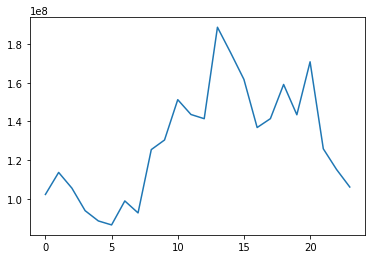

In [95]:
# plot of sum of expense
plt.plot(
    data_t_trans[['transactionRevenue','hour']].groupby('hour').agg('mean'))

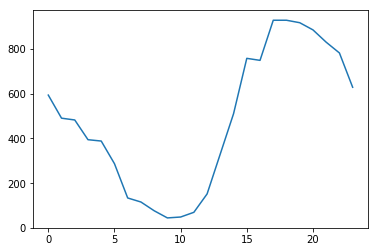

In [69]:
plt.plot(data_t_trans.groupby('hour').size())

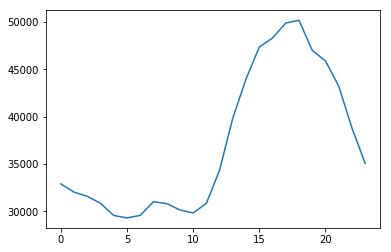

In [70]:
plt.plot(data_t_ntrans.groupby('hour').size())

- find that `hour` might be an interesting variable

## for month

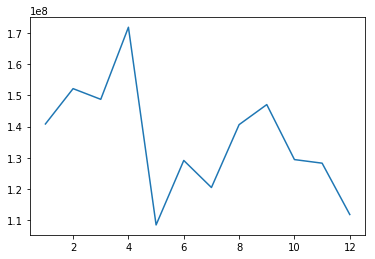

In [94]:
# revenue plot
plt.plot(
    data_t_trans[['transactionRevenue','month']].groupby('month').agg('mean'))

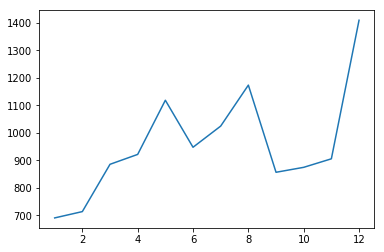

In [63]:
plt.plot(data_t_trans.groupby('month').size())

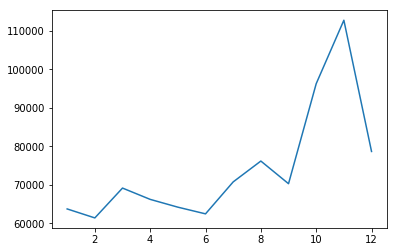

In [71]:
plt.plot(data_t_ntrans.groupby('month').size())

- find that holidays might enhance people purchase and visits

## for weekday

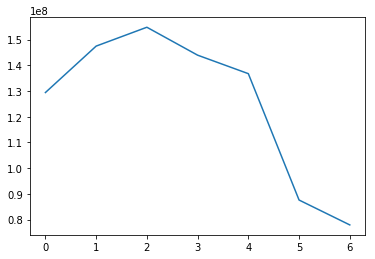

In [93]:
# revenue plot
plt.plot(
    data_t_trans[['transactionRevenue','weekday']].groupby('weekday').agg('mean'))

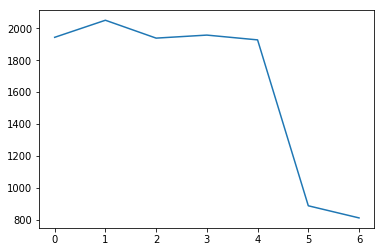

In [61]:
plt.plot(data_t_trans.groupby('weekday').size())

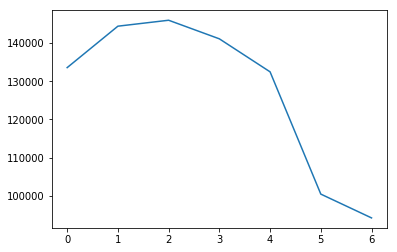

In [72]:
plt.plot(data_t_ntrans.groupby('weekday').size())

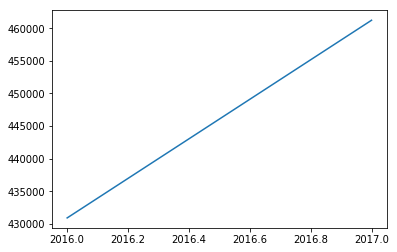

In [131]:
plt.plot(data_t_ntrans.groupby('year').size())

- visit num must be very useful to predict whether they will spend money or not

# EDA with device

## Browser

In [97]:
data_device[data_device['trans']==1].groupby('browser').mean()['transactionRevenue'].sort_values(ascending=False)

browser
Firefox              4.676247e+08
Chrome               1.335946e+08
Edge                 1.117753e+08
Internet Explorer    7.573899e+07
Safari               6.717626e+07
Opera                4.307000e+07
Amazon Silk          2.999000e+07
Android Webview      1.914167e+07
Safari (in-app)      1.281417e+07
Name: transactionRevenue, dtype: float64

In [114]:
data_device[data_device['trans']==0].groupby('browser').size().sort_values(
    ascending=False).head()/data_device[data_device['trans']==0].size

browser
Chrome               0.085470
Safari               0.025426
Firefox              0.005167
Internet Explorer    0.002699
Edge                 0.001422
dtype: float64

In [115]:
data_device[data_device['trans']==1].groupby('browser').size().sort_values(
    ascending=False).head(10)/data_device[data_device['trans']==0].size

browser
Chrome               1.450588e-03
Safari               1.092880e-04
Firefox              2.676155e-05
Internet Explorer    1.527230e-05
Edge                 8.126545e-06
Safari (in-app)      1.681354e-06
Android Webview      8.406771e-07
Opera                7.005643e-07
Amazon Silk          1.401129e-07
dtype: float64

In [98]:
data_device[data_device['trans']==1].groupby('browser').sum()['transactionRevenue'].sort_values(ascending=False)

browser
Chrome               1.383105e+12
Firefox              8.931632e+10
Safari               5.239748e+10
Internet Explorer    8.255550e+09
Edge                 6.482970e+09
Opera                2.153500e+08
Safari (in-app)      1.537700e+08
Android Webview      1.148500e+08
Amazon Silk          2.999000e+07
Name: transactionRevenue, dtype: float64

In [104]:
data_device[data_device['trans']==1 & (data_device['isMobile']==1)].groupby(
    'browser').mean()['transactionRevenue'].sort_values(ascending=False).head()

browser
Chrome               7.252969e+07
Internet Explorer    4.406438e+07
Safari               4.211858e+07
Amazon Silk          2.999000e+07
Firefox              2.323500e+07
Name: transactionRevenue, dtype: float64

In [116]:
data_device[data_device['trans']==1 & (data_device['isMobile']==1)].groupby(
    'browser').mean()['transactionRevenue'].sort_values(ascending=False).head()

browser
Chrome               7.252969e+07
Internet Explorer    4.406438e+07
Safari               4.211858e+07
Amazon Silk          2.999000e+07
Firefox              2.323500e+07
Name: transactionRevenue, dtype: float64

In [119]:
browser_chrome = data_device['browser']=='Chrome'

## isMobile

## operatingSystem

In [124]:
system_google = (data_device['operatingSystem']=='Android')|(data_device['operatingSystem']=='Chrome OS')